In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Looking at the data**

In [2]:
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.drop(['CustomerID',"Gender","Age"],axis=1,inplace=True)

In [4]:
data.shape

(200, 2)

**Check for outliers**

In [5]:
data.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


Data before scaling

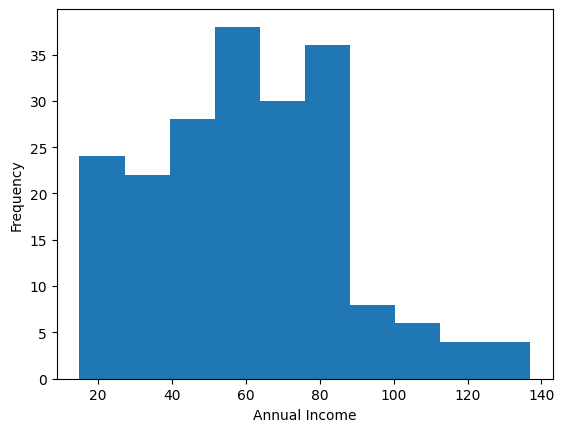

In [6]:
data['Annual Income (k$)'].plot(kind='hist',bins=10)
plt.xlabel("Annual Income")
plt.show()

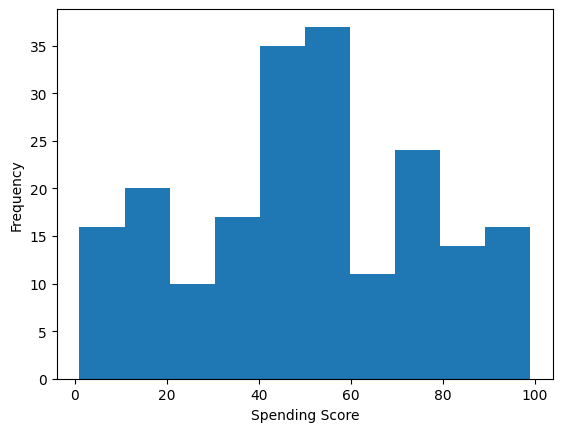

In [7]:
data['Spending Score (1-100)'].plot(kind='hist')
plt.xlabel('Spending Score')
plt.show()

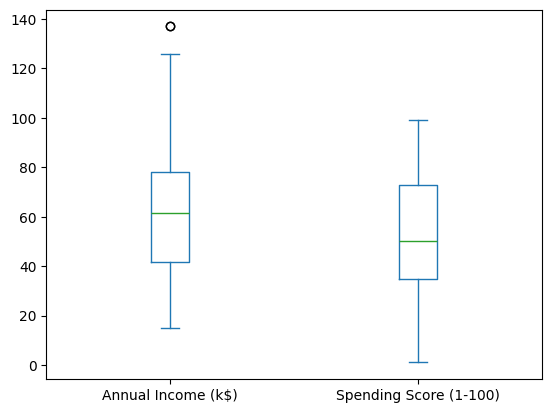

In [8]:
data.plot(kind='box')
plt.show()

**Dropping outliers as the represent only 0.1% of the data**

In [9]:
outlier = data['Annual Income (k$)'].max()

data = data[data['Annual Income (k$)'] != outlier]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
193,113,91
194,120,16
195,120,79
196,126,28


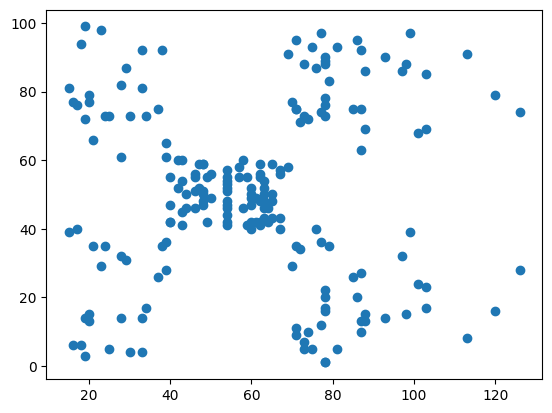

In [10]:
plt.scatter(x=data['Annual Income (k$)'],y=data['Spending Score (1-100)'])
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans,DBSCAN

**Scale Data**

In [12]:
sc = StandardScaler()
X_transformed = sc.fit_transform(data)
df = pd.DataFrame(X_transformed,columns=sc.feature_names_in_)

In [13]:
df

,Annual Income (k$),Spending Score (1-100)
0,-1.779171,-0.435989
1,-1.779171,1.199413
2,-1.739447,-1.720949
3,-1.739447,1.043661
4,-1.699723,-0.397051
...,...,...
193,2.113819,1.588795
194,2.391890,-1.331567
195,2.391890,1.121537
196,2.630236,-0.864309


**Plotting Scalled data**

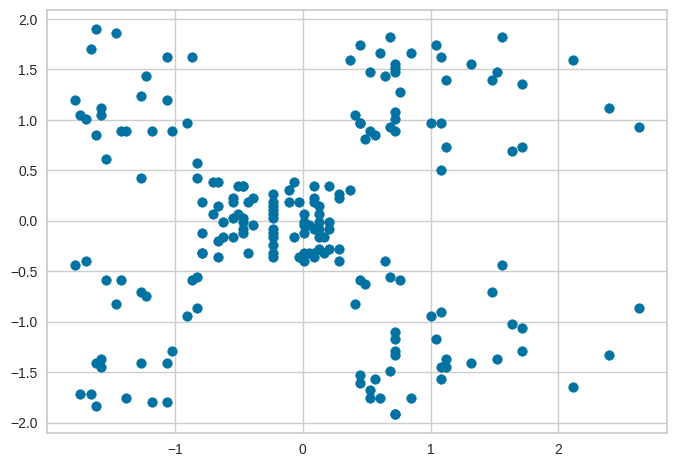

In [14]:
plt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])
plt.show()

Intializing the KMeans model

In [15]:
km= KMeans(random_state=10)

**Hyperparmeter Tuning the Model**

the scores for each K is:  [np.float64(0.37522482955866626), np.float64(0.4966903984217057), np.float64(0.5599199830769206), np.float64(0.4653191482014843), np.float64(0.4591526472516767), np.float64(0.45743300123294994), np.float64(0.44291258707779607), np.float64(0.4401460670897208)]



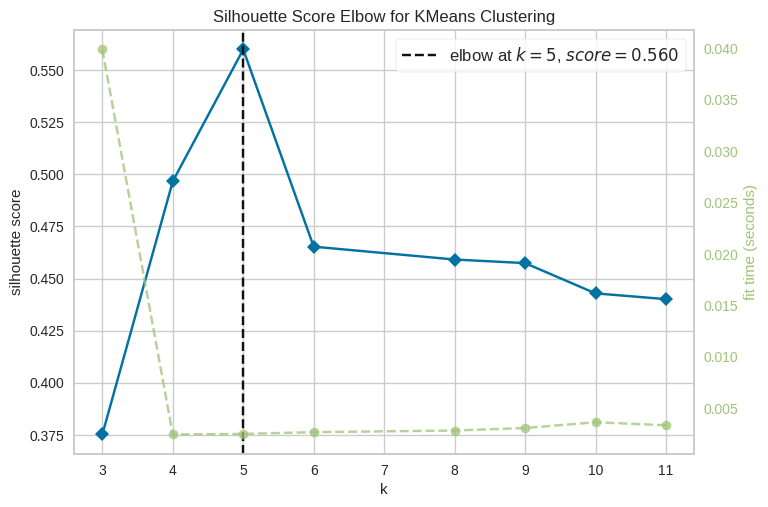

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [16]:
#KElbowVisualizer is  specialized hypertuning model for kmeans where it checks for the value where any k> than it causes loss
# and any less causes loss as well (Elbow position)
km_tuner = KElbowVisualizer(km,k=(3,4,5,6,8,9,10,11),metric='silhouette')
km_tuner.fit(df)
print("the scores for each K is: ",km_tuner.k_scores_)
print()
km_tuner.show()

**Building the model And checkign the inertia score**

In [17]:
km_model = KMeans(n_clusters=5,random_state=10)
pred = km_model.fit(df)
print("the inertia score of the model is:",km_model.inertia_)

the inertia score of the model is: 61.08666097712


**Check the how the model clustered the data**

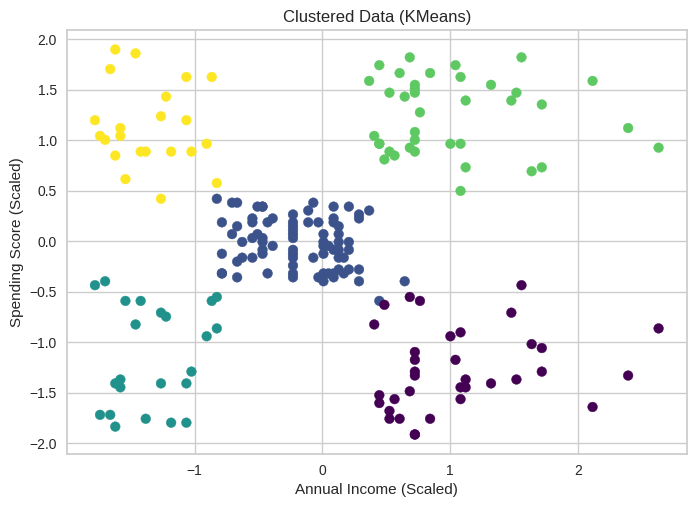

In [19]:
df['km_cluster'] = km_model.labels_
plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], c=df['km_cluster'], cmap='viridis')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.title('Clustered Data (KMeans)')
plt.show()

**DBScan and manual hyperparameter tuning**

In [20]:
from sklearn.metrics import silhouette_score

In [21]:
score=-1
best_score=score
for eps in [0.5,0.75,1]:
  for min_samples in [2,3]:
    model = DBSCAN(eps=eps,min_samples=min_samples).fit(df)
    labels = model.labels_
    #this skips iterations where the clustering resulted in 1 or less clusters
    if len(set(labels)) <=1:
      continue

    score = silhouette_score(df,labels)
    if score>best_score:
      best_score= score
      best_eps = eps
      best_min_samples = min_samples
      print('new best score with eps ',eps,"  and min_samples ",min_samples)
      print("new best score: ",best_score)

new best score with eps  0.5   and min_samples  2
new best score:  0.575005412485656
new best score with eps  0.5   and min_samples  3
new best score:  0.6435470490615386
new best score with eps  0.75   and min_samples  2
new best score:  0.6731242567360198


Building the best model and checking the clustering

In [22]:
best_dbscan_model = DBSCAN(eps=best_eps,min_samples=best_min_samples).fit(df)
labels = best_dbscan_model.labels_
df['db_cluster']= labels

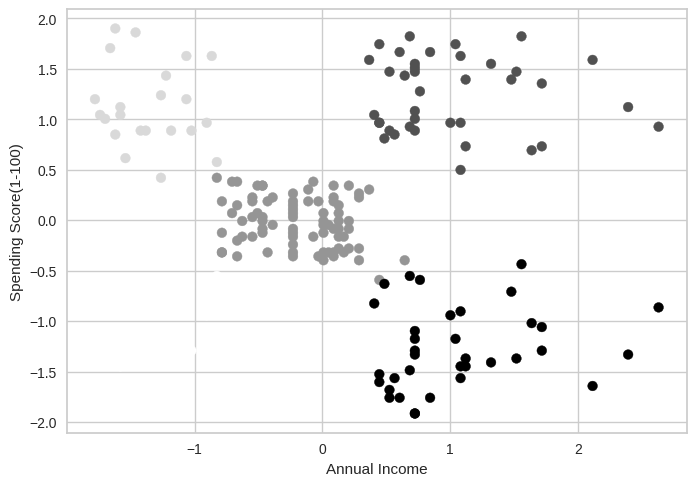

In [23]:
plt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],c=df['db_cluster'])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score(1-100)")
plt.show()